<a href="https://colab.research.google.com/github/Saif-Khan435/Retail-Sales-Prediction/blob/main/Team_KASAR_Mohammed_Saif_Khan_M4W3_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# Loading Libraries :

In [ ]:
# Libraries for Basic Operations on Dataset and Plotting

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

We will be using the Numpy library for numerical operations and Pandas library for data analysis. We also have matplotlib and seaborn libraries that will be used for plotting. %matplotlib inline is to display the plots inside the notebook.

In [ ]:
# Librarires for Linear Regression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

From the sklearn library we have imported train_test_split that is used to divide the dataset into two groups i.e. train set and test set. We also have imported MinMaxScaler that is used to transform the features and finally we have imported LinearRegression which will be for Linear Regression Modelling.

In [ ]:
# Libraries for Checking Metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

From the sklearn library we have imported mean_square_error, mean_absolute_error, mean_absolute_percentage_error and r2_score to find the metrics for each model.

In [ ]:
# Libraries for Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor

From the sklearn library we have imported the DecisionTreeRegressor to perform Decision Tree Regression.

In [ ]:
# Library for Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

From the sklearn library we have imported the RandomForestRegressor to perform Random Forest Regression.

In [ ]:
# Library for Hyperparameter Tuning

from sklearn.model_selection import RandomizedSearchCV

From the sklearn library we have imported RandomizedSearchCV to perform cross-validation.

In [ ]:
# Library for Ignoring warnings

import warnings
warnings.filterwarnings('ignore')

We have imported the warnings library to ignore the warnings that promopted at runtime.

In [ ]:
# Setting Parameters for the plots

plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})

Here we are setting the parameters for the plots before start the plotting.

# Loading Datasets :

In [ ]:
# Mounting the google drive to google colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We import drive from google library to mount the google drive to the google colab.

In [ ]:
# Loading the first dataset

sales_df = pd.read_csv('/content/drive/MyDrive/Alma Better Pinnacle Pro/Module 4 - Capstone Projects/Retail Sales Prediction/Copy of Rossmann Stores Data.csv',parse_dates=['Date'])

We are loading the first dataset i.e. the sales dataset which is the Rossmann Stores Data as `sales_df`.

In [ ]:
# Loading the second dataset

store_df = pd.read_csv('/content/drive/MyDrive/Alma Better Pinnacle Pro/Module 4 - Capstone Projects/Retail Sales Prediction/Copy of store.csv')

We are loading the second dataset i.e. the store dataset which is the Stores as `store_df`.

# Data Exploration :

In [ ]:
# Check shape of the first dataset

sales_df.shape

(1017209, 9)

The shape of the `sales_df` is 1017209 rows and 9 columns.

In [ ]:
# Check columns of the first dataset

sales_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

The columns of the `sales_df` are `Store`,`DayOfWeek`,`Date`,`Sales`,`Customers`,`Open`,`Promo`,`StateHoliday`,`SchoolHoliday`.

In [ ]:
# Check the first 5 rows of the dataset

sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


This shows the first 5 rows of the `sales_df` which helps us understand the data we have in each row.

In [ ]:
# Check the last 5 rows of the dataset

sales_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


This shows the last 5 rows of the `sales_df` which helps us understand the data we have in each row.

In [ ]:
# Check basic infomation about the dataset

sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


Here we can see that the `sales_df` has in total 9 columns and the datatypes for those columns are 1 datetime, 7 int and 1 object type.

In [ ]:
# Check shape of the second dataset

store_df.shape

(1115, 10)

The shape of the `store_df` is 1115 rows and 10 columns.

In [ ]:
# Check columns of the second dataset

store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

The columns of the `store_df` are `Store`,`StoreType`,`Assortment`,`CompetitionDistance`,`CompetitionOpenSinceMonth`,`CompetitionOpenSinceYear`,`Promo2`,`Promo2SinceWeek`,`Promo2SinceYear`,`PromoInterval`.

In [ ]:
# Check the first 5 rows of the dataset

store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


This shows the first 5 rows of the `store_df` which helps us understand the data we have in each row.

In [ ]:
# Check the last 5 rows of the dataset

store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


This shows the last 5 rows of the `store_df` which helps us understand the data we have in each row.

In [ ]:
# Check basic infomation about the dataset

store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Here we can see that the `store_df` has in total 10 columns and the datatypes for those columns are 5 float, 2 int and 3 object type.

# Data Cleaning And Preparation :

## Data Cleaning :

In [ ]:
# Check total null values in first dataset

sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

As we can see there are no null values in the `sales_df`.

In [ ]:
# Check total null values in second dataset

store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In the `store_df` we can see that there are
* 3 NaN values in `CompetitionDistance`
* 354 NaN values in `CompetitionOpenSinceMonth` and `CompetitionOpenSinceWeek`
* 544 NaN values in `Promo2SinceWeek`, `Promo2SinceYear` and `PromoInterval`.

We have to check the percentage of null values in each column.

In [ ]:
# Check percentage of null values in CompetitionDistance column

print(f"Percentage of Null Values : {(store_df.CompetitionDistance.isnull().sum()/store_df.shape[0])*100} %")

Percentage of Null Values : 0.26905829596412556 %


We found that there are 0.26% of NaN values in the `CompetitionDistance` column. The percentage mentioned above is small so we have to look into the data.

In [ ]:
# Check rows with null values in CompetitionDistance column

store_df[store_df.CompetitionDistance.isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


When we looked into the data, we found that the other columns had proper data present in the them so we have decided to replace the data insteaded of removing it. 

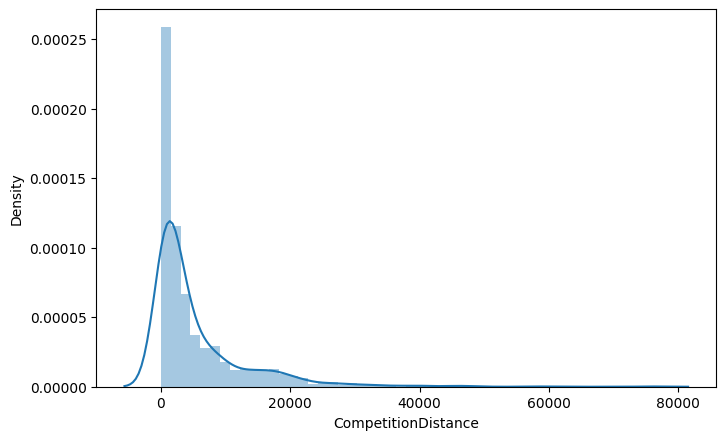

In [ ]:
sns.distplot(store_df.CompetitionDistance)

Since the plot is positively skewed so we will use the medain to replace the NaN values in the `CompetitionDistance` column.

In [ ]:
# Replacing the null values with meadian in the CompetitionDistance column

store_df.CompetitionDistance.fillna(store_df.CompetitionDistance.median(),inplace=True)

We use fillna() to replace the NaN values with the medain values of the `CompetitionDistance` column.

In [ ]:
# Check percentage of null values in CompetitionOpenSinceMonth column

print(f"Percentage of Null Values : {(store_df.CompetitionOpenSinceMonth.isnull().sum()/store_df.shape[0])*100} %")

Percentage of Null Values : 31.748878923766817 %


We found that there are 31.74% of NaN values in the `CompetitionOpenSinceMonth` column. The percentage mentioned above is big so we have to remove this column as approximately 1/3 of the column has null values and replacing those values would effect the final prediction.

In [ ]:
# Check percentage of null values in CompetitionOpenSinceYear column

print(f"Percentage of Null Values : {(store_df.CompetitionOpenSinceYear.isnull().sum()/store_df.shape[0])*100} %")

Percentage of Null Values : 31.748878923766817 %


We found that there are 31.74% of NaN values in the `CompetitionOpenSinceYear` column. The percentage mentioned above is big so we have to remove this column as approximately 1/3 of the column has null values and replacing those values would effect the final prediction.

In [ ]:
# Check percentage of null values in Promo2SinceWeek column

print(f"Percentage of Null Values : {(store_df.Promo2SinceWeek.isnull().sum()/store_df.shape[0])*100} %")

Percentage of Null Values : 48.789237668161434 %


We found that there are 48.78% of NaN values in the `Promo2SinceWeek` column. The percentage mentioned above is huge so we have to remove this column as approximately 1/2 of the column has null values and replacing those values would effect the final prediction.

In [ ]:
# Check percentage of null values in Promo2SinceYear column

print(f"Percentage of Null Values : {(store_df.Promo2SinceYear.isnull().sum()/store_df.shape[0])*100} %")

Percentage of Null Values : 48.789237668161434 %


We found that there are 48.78% of NaN values in the `Promo2SinceYear` column. The percentage mentioned above is huge so we have to remove this column as approximately 1/2 of the column has null values and replacing those values would effect the final prediction.

In [ ]:
# Check percentage of null values in PromoInterval column

print(f"Percentage of Null Values : {(store_df.PromoInterval.isnull().sum()/store_df.shape[0])*100} %")

Percentage of Null Values : 48.789237668161434 %


We found that there are 48.78% of NaN values in the `PromoInterval` column. The percentage mentioned above is huge so we have to remove this column as approximately 1/2 of the column has null values and replacing those values would effect the final prediction.

In [ ]:
# Removing the columns with higher percentage of null values

store_df.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval'],axis=1,inplace=True)

So, we use the drop() to drop the column from `store_df` that have higher percentage of null values i.e. `CompetitionOpenSinceMonth`, `CompetitionOpenSinceWeek`,
 `Promo2SinceWeek`, `Promo2SinceYear` and `PromoInterval`.

Now, we don't have any null values or missing values in both the datasets so we can go to the merging step.

## Data Merging :

In [ ]:
# Merge the two datasets

store_sales_df = pd.merge(sales_df,store_df,how='left',on='Store')

We left join the `sales_df` and `store_df` to `store_sales_df` using the merge() on the `Store` column.

In [ ]:
# Check shape of the dataset

store_sales_df.shape

(1017209, 13)

The shape of the `store_sales_df` is 1017209 rows and 13 columns.

In [ ]:
# Check the first 5 rows of the dataset

store_sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,0


This shows the first 5 rows of the `store_sales_df` which helps us understand the data we have in each row.

In [ ]:
# Check the last 5 rows of the dataset

store_sales_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,1


This shows the last 5 rows of the `store_sales_df` which helps us understand the data we have in each row.

In [ ]:
# Check total null values in the dataset

store_sales_df.isnull().sum()

Store                  0
DayOfWeek              0
Date                   0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

As we can see there are no null values in the `store_sales_df`.

In [ ]:
# Check basic infomation about the dataset

store_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   DayOfWeek            1017209 non-null  int64         
 2   Date                 1017209 non-null  datetime64[ns]
 3   Sales                1017209 non-null  int64         
 4   Customers            1017209 non-null  int64         
 5   Open                 1017209 non-null  int64         
 6   Promo                1017209 non-null  int64         
 7   StateHoliday         1017209 non-null  object        
 8   SchoolHoliday        1017209 non-null  int64         
 9   StoreType            1017209 non-null  object        
 10  Assortment           1017209 non-null  object        
 11  CompetitionDistance  1017209 non-null  float64       
 12  Promo2               1017209 non-null  int64         
dt

Here we can see that the `store_sales_df` has in total 13 columns and the datatypes for those columns are 1 datetime, 1 float, 8 int and 3 object type.

In [ ]:
# Check descriptive stats for the dataset

store_sales_df.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1017209,1017209,1.017209e+06,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN,4,3,NaN,NaN
top,NaN,NaN,2015-07-31 00:00:00,NaN,NaN,NaN,NaN,0,NaN,a,a,NaN,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN,551627,537445,NaN,NaN
first,NaN,NaN,2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2015-07-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01,NaN,NaN,5.422021e+03,5.005638e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01,NaN,NaN,7.706918e+03,4.999999e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.000000e+01,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,7.100000e+02,0.000000e+00


After doing the descriptive statistical analysis we know the mean, std, quartile ranges, min and max values for the columns in `store_sales_df`.

## Data Preparation :

In [ ]:
store_sales_df.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

While checking the data in `store_sales_df` we found that `StateHoliday` had both number and string type values so to remove any kind of misunderstanding we will change the values to the same datatype.

In [ ]:
# Changing datatype of the StateHoliday values

store_sales_df.StateHoliday = store_sales_df.StateHoliday.apply(str)

The apply() will change the datatype of all the numeric values to string type.

In [ ]:
store_sales_df.StateHoliday.value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

As we can see all the values in the `StateHoliday` column are of string type.